In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
LENA_IMG = '../lena.png'

img_lena = cv2.cvtColor(cv2.imread(LENA_IMG), cv2.COLOR_BGR2RGB)

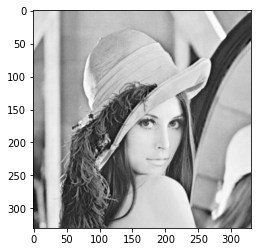

In [18]:
lena_gray = img_lena[:, :, 0]
plt.imshow(lena_gray, cmap='gray')

In [8]:
hist_equ = cv2.equalizeHist(lena_gray)
res = np.hstack((lena_gray, hist_equ))

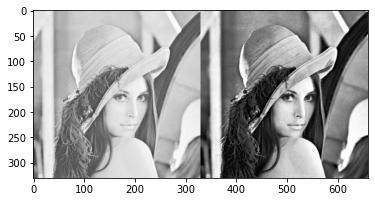

In [10]:
plt.imshow(res, cmap='gray')

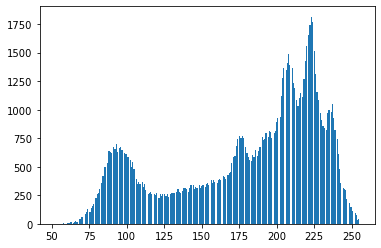

In [12]:
plt.hist(lena_gray.ravel(), bins=256);

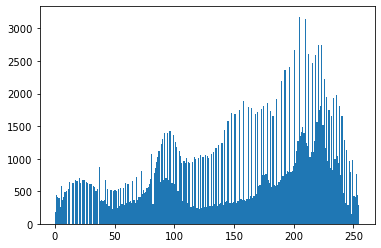

In [13]:
plt.hist(res.ravel(), bins=256);

In [19]:
def threshold_1d(img, r1, s1, r2, s2, max_=255):
    # contrast stretching for 1d image (gray)
    
    y1 = lambda r: r1*r
    
    def y2(r):
        m = (s2-s1)/(r2-r1)
        b = s2 - m*r2
        
        return m*r + b

    def y3(r):
        m = (max_-s2)/(max_-s2)
        b = max_ - m*max_
        
        return m*r + b
    
    img_shape = img.shape
    tmp = img.ravel()
    
    tmp[tmp < r1] = y1(tmp[tmp < r1]).astype(int)

    cond2 = (r1 < tmp) & (tmp < r2)
    tmp[cond2] = y2(tmp[cond2]).astype(int)
    
    tmp[r2 < tmp] = y3(tmp[r2 < tmp]).astype(int)
    
    return tmp.reshape(img_shape)

In [24]:
tmp = threshold_1d(lena_gray, r1=5, s1=240, r2=255, s2=240)

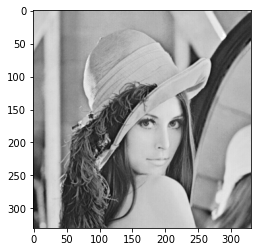

In [25]:
plt.imshow(tmp, cmap='gray')

In [26]:
STAT_IMG = './4.png'

stat_img = cv2.cvtColor(cv2.imread(STAT_IMG), cv2.COLOR_BGR2RGB)[:, :, 0]

In [40]:
stat_img_fix = cv2.resize(stat_img, (420, 420))[:, :, 0]

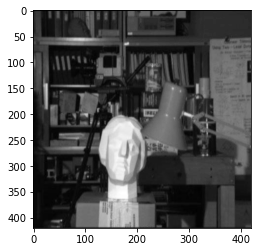

In [42]:
plt.imshow(stat_img_fix, cmap='gray')

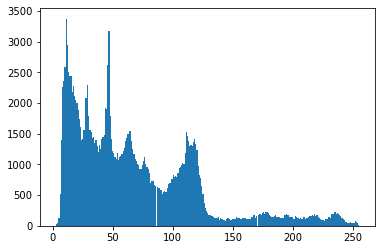

In [44]:
plt.hist(stat_img_fix.ravel(), bins=256);

In [45]:
stat_equ = cv2.equalizeHist(stat_img_fix)
stat_res = np.hstack((stat_img_fix, stat_equ))

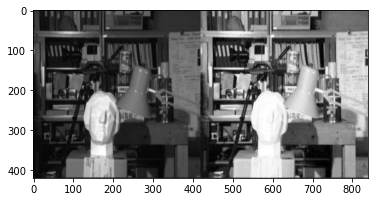

In [47]:
plt.imshow(stat_res, cmap='gray')

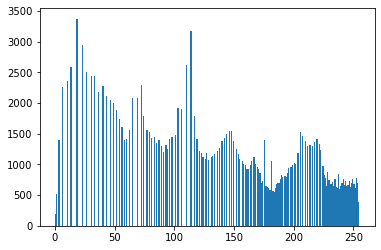

In [48]:
plt.hist(stat_equ.ravel(), bins=256);

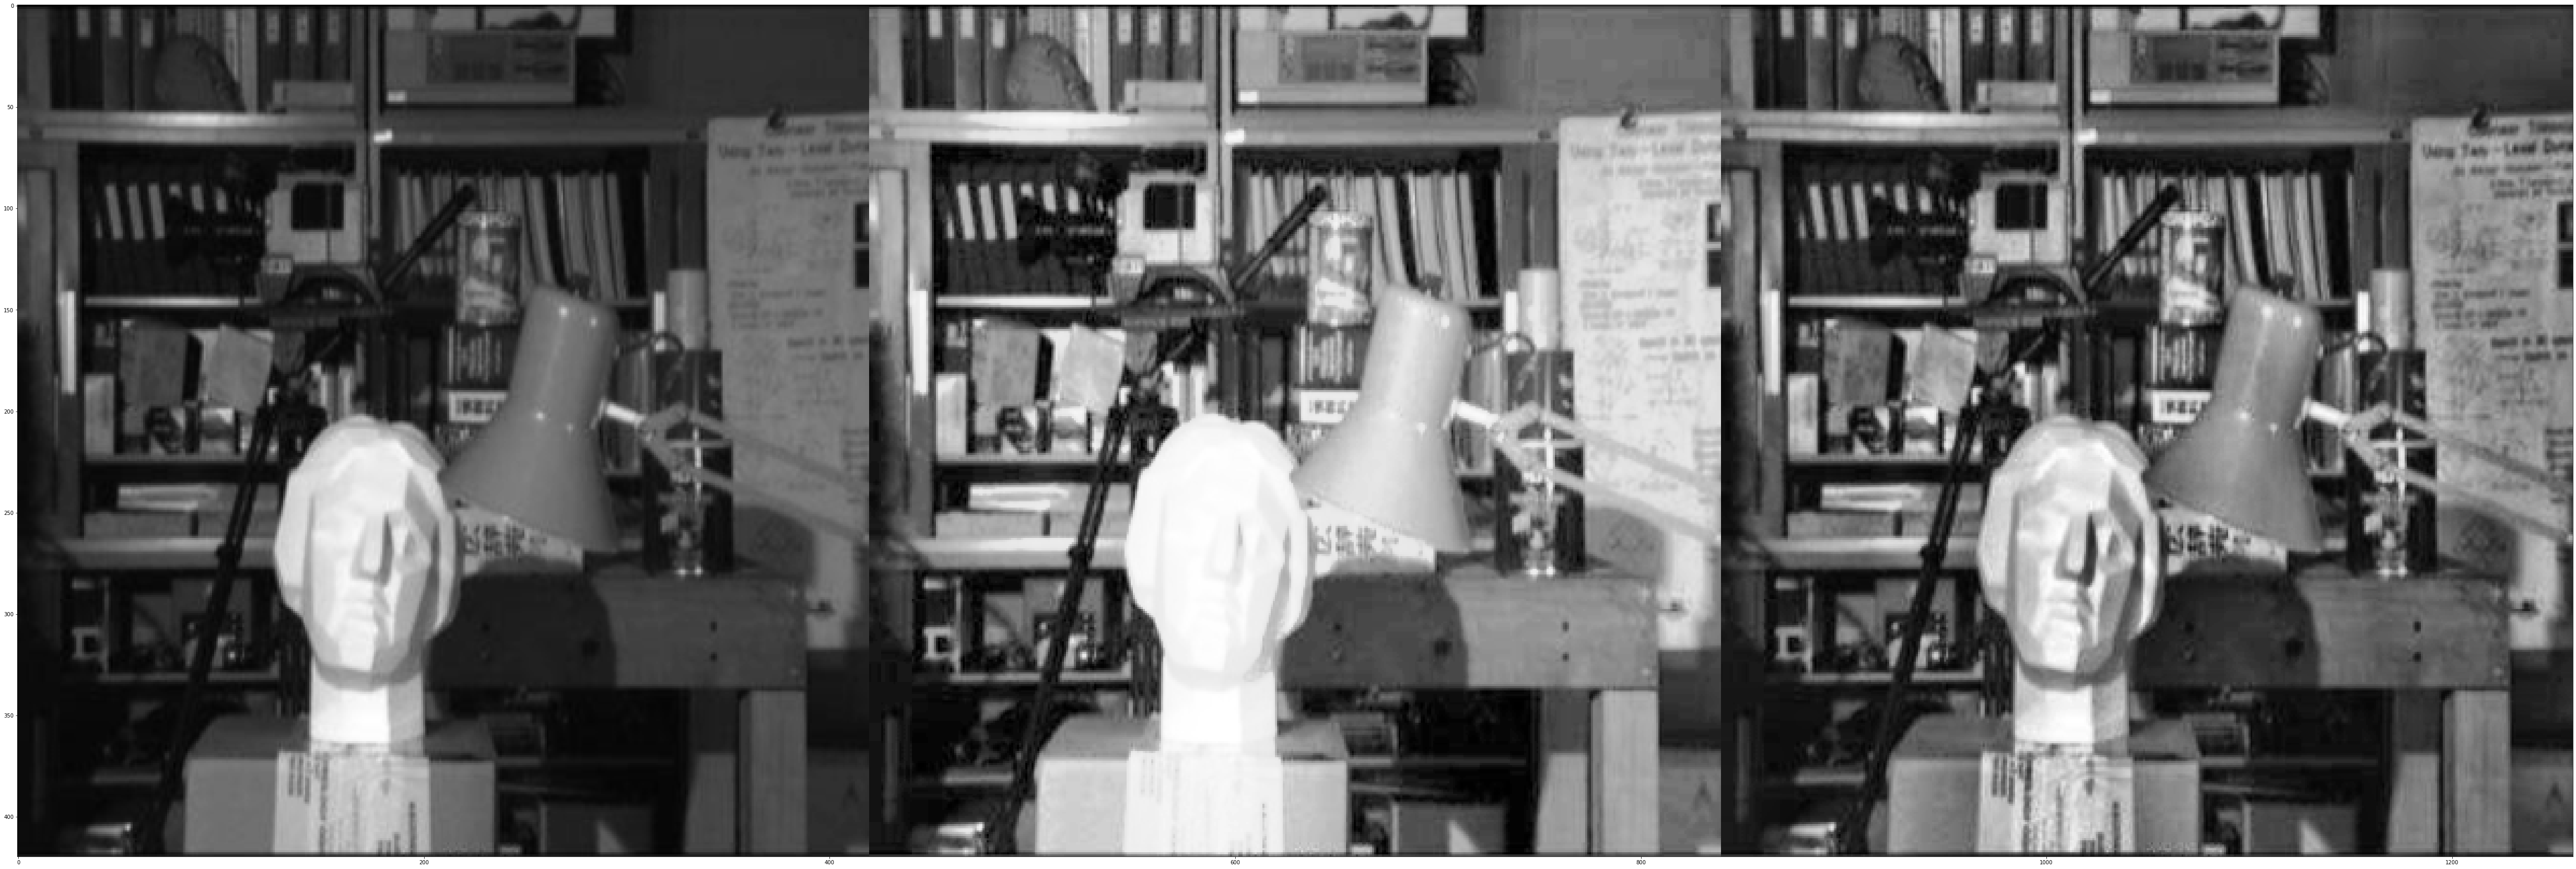

In [54]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(15, 15))
cl1 = clahe.apply(stat_img_fix)

plt.figure(figsize=(120, 30))
plt.imshow(np.hstack((stat_img_fix, stat_equ, cl1)), cmap='gray')

In [1]:
import skimage

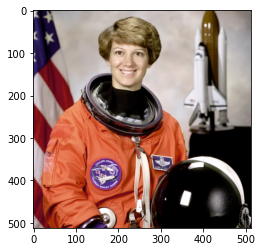

In [19]:
plt.imshow(skimage.data.astronaut())

In [17]:
from skimage.exposure import match_histograms

In [37]:
img[:, :, 0].reshape(*img[:, :, 0].shape, 1).shape

(300, 451, 1)

In [39]:
img = skimage.data.cat()
ref = skimage.data.moon()

ref = ref.reshape(*ref.shape, 1)

matched = np.zeros(img.shape)

matched[:, :, 0] = match_histograms(img[:, :, 0].reshape(*img[:, :, 0].shape, 1), ref, channel_axis=-1)
matched[:, :, 1] = match_histograms(img[:, :, 1].reshape(*img[:, :, 1].shape, 1), ref, channel_axis=-1)
matched[:, :, 2] = match_histograms(img[:, :, 2].reshape(*img[:, :, 2].shape, 1), ref, channel_axis=-1)

ValueError: could not broadcast input array from shape (300,451,1) into shape (300,451)

In [62]:
woman_img = cv2.cvtColor(cv2.imread('./woman_laugh_washed_out.jpeg'), cv2.COLOR_BGR2GRAY)

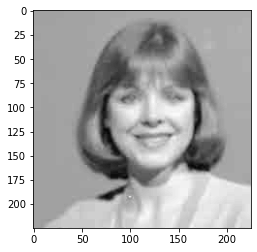

In [63]:
plt.imshow(woman_img, cmap='gray')

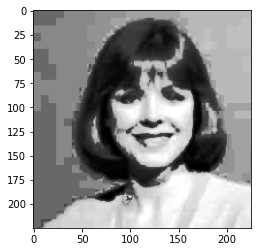

In [52]:
plt.imshow(cv2.equalizeHist(img), cmap='gray')

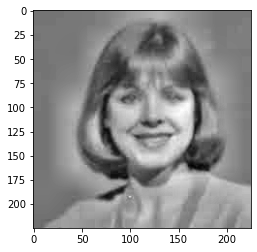

In [56]:
clahe = cv2.createCLAHE(clipLimit=2.0)
plt.imshow(clahe.apply(img), cmap='gray')

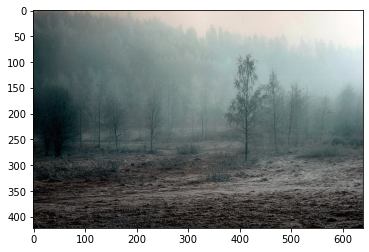

In [61]:
ref_img = cv2.imread('./after_contrast_stretching.png')
plt.imshow(ref_img)

In [74]:
woman_img_3d = np.zeros((*woman_img.shape, 3))
woman_img_3d[:, :, 0] = woman_img
woman_img_3d[:, :, 1] = woman_img
woman_img_3d[:, :, 2] = woman_img

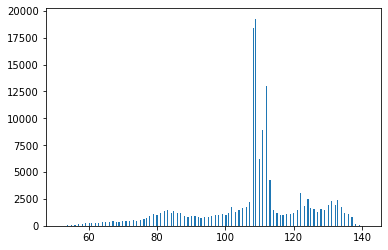

In [77]:
plt.hist(woman_img_3d.ravel(), bins=256);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


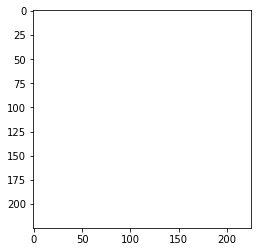

In [75]:
plt.imshow(woman_img_3d)

In [69]:
woman_matched = match_histograms(woman_img_3d, ref_img, channel_axis=-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


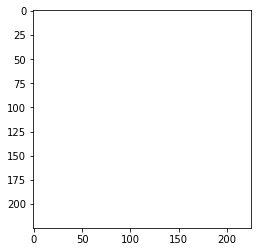

In [70]:
plt.imshow(woman_matched)

In [57]:
girl_img = cv2.cvtColor(cv2.imread('./arrogrant_kid_washed_out.jpeg'), cv2.COLOR_BGR2GRAY)

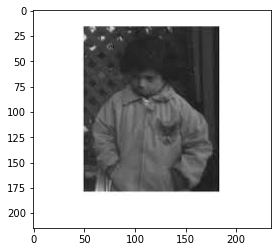

In [60]:
plt.imshow(girl_img, cmap='gray')

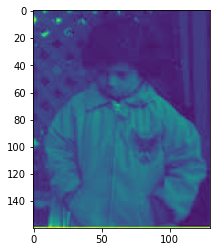

In [81]:
plt.imshow(girl_img[20:180, 50:180])

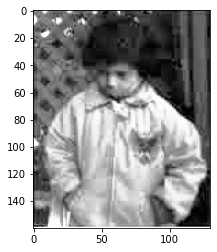

In [82]:
plt.imshow(cv2.equalizeHist(girl_img[20:180, 50:180]), cmap='gray')

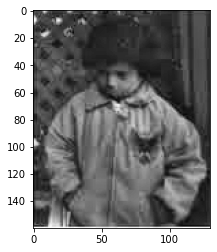

In [83]:
clahe = cv2.createCLAHE(clipLimit=2.0)
plt.imshow(clahe.apply(girl_img[20:180, 50:180]), cmap='gray')

In [109]:
img_1 = cv2.imread('/run/media/neotod/joint/multimedia/photos/colors_and_emotions/going_deep.jpg')
anger_ref = cv2.cvtColor( cv2.imread('/run/media/neotod/joint/multimedia/photos/colors_and_emotions/anger.jpg'), cv2.COLOR_BGR2RGB)
hap_ref = cv2.cvtColor( cv2.imread('/run/media/neotod/joint/multimedia/photos/colors_and_emotions/happiness.jpg'), cv2.COLOR_BGR2RGB)
want_ref = cv2.cvtColor( cv2.imread('/run/media/neotod/joint/multimedia/photos/colors_and_emotions/wanting_and_pain/wanting_and_pain.png'), cv2.COLOR_BGR2RGB)
gain_ref = cv2.cvtColor( cv2.imread('/run/media/neotod/joint/multimedia/photos/colors_and_emotions/gaining_knowledge/gaining_knowledge_2.jpg'), cv2.COLOR_BGR2RGB)



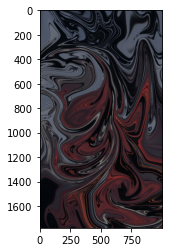

In [91]:
plt.imshow(ref)

In [92]:
mtched_img = match_histograms(img_1, ref, channel_axis=-1)

In [103]:
mtched_img2 = match_histograms(img_1, hap_ref, channel_axis=-1)

In [107]:
mtched_img3 = match_histograms(img_1, want_ref, channel_axis=-1)

In [110]:
mtched_img4 = match_histograms(img_1, gain_ref, channel_axis=-1)

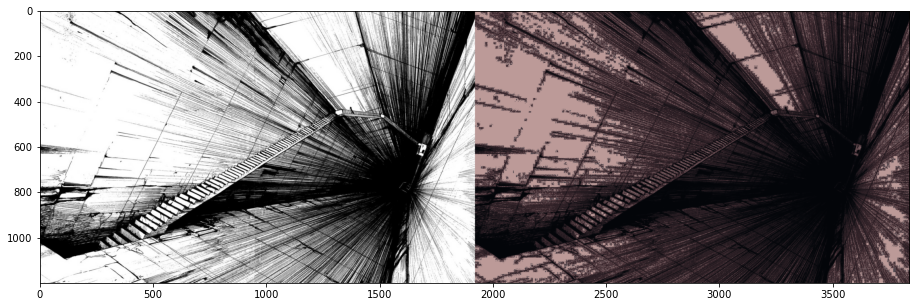

In [100]:
plt.figure(figsize=(20, 5))
plt.imshow(np.hstack((img_1, mtched_img)))

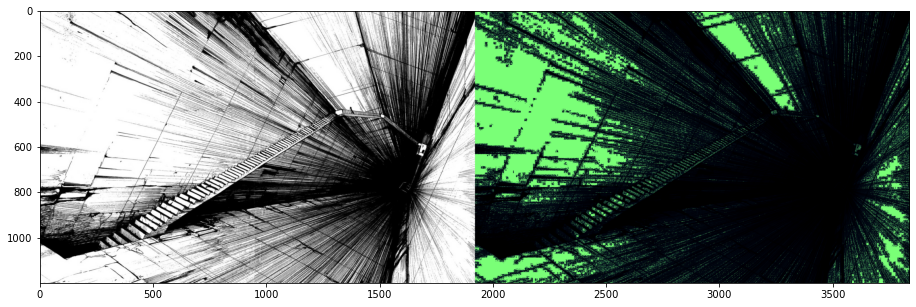

In [104]:
plt.figure(figsize=(20, 5))
plt.imshow(np.hstack((img_1, mtched_img2)))

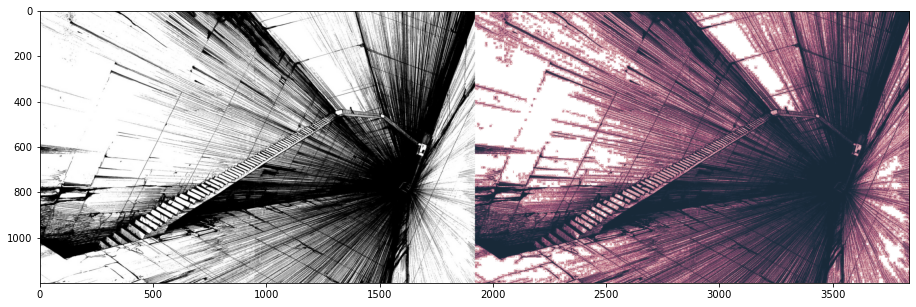

In [108]:
plt.figure(figsize=(20, 5))
plt.imshow(np.hstack((img_1, mtched_img3)))

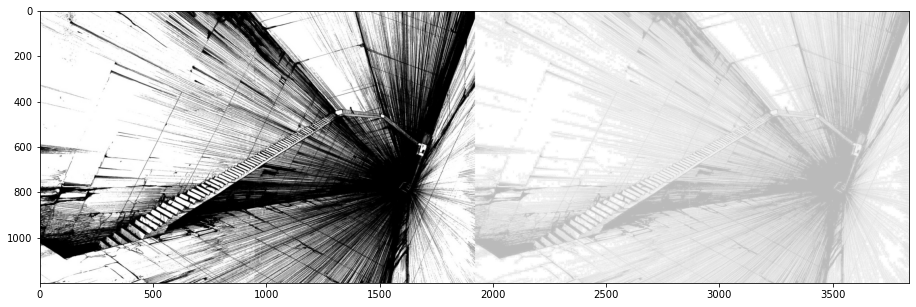

In [111]:
plt.figure(figsize=(20, 5))
plt.imshow(np.hstack((img_1, mtched_img4)))

In [112]:
rock_img = cv2.cvtColor( cv2.imread('./rock.png'), cv2.COLOR_BGR2RGB)

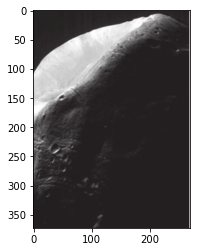

In [113]:
plt.imshow(rock_img)

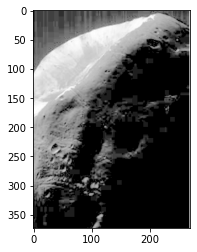

In [125]:
plt.imshow(cv2.equalizeHist(rock_img[:, :, 0]), cmap='gray')

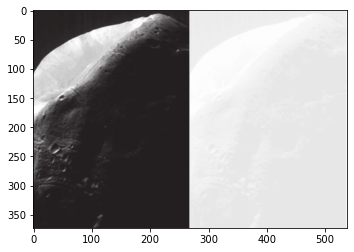

In [132]:
rock_mtched = match_histograms(rock_img, gain_ref, channel_axis=-1)

plt.imshow(np.hstack((rock_img, rock_mtched)))

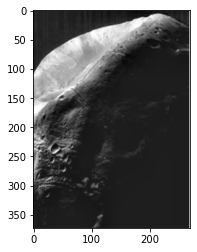

In [126]:
plt.imshow(clahe.apply(rock_img[:, :, 0]), cmap='gray')

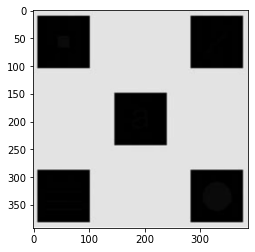

In [136]:
tmp_img = cv2.cvtColor( cv2.imread('./tmp.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(tmp_img, cmap='gray')

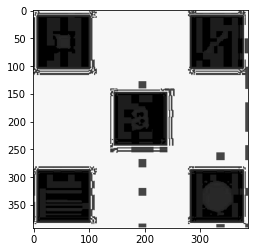

In [137]:
plt.imshow(cv2.equalizeHist(tmp_img), cmap='gray')

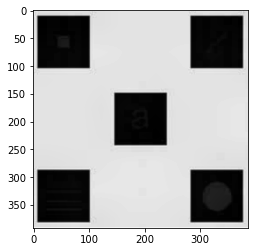

In [139]:

plt.imshow(clahe.apply(tmp_img), cmap='gray')